In [37]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [13]:
# from imutils
# https://github.com/jrosebr1/imutils/blob/master/imutils/convenience.py
def grab_contours(cnts):
    # if the length the contours tuple returned by cv2.findContours
    # is '2' then we are using either OpenCV v2.4, v4-beta, or
    # v4-official
    if len(cnts) == 2:
        cnts = cnts[0]

    # if the length of the contours tuple is '3' then we are using
    # either OpenCV v3, v4-pre, or v4-alpha
    elif len(cnts) == 3:
        cnts = cnts[1]

    # otherwise OpenCV has changed their cv2.findContours return
    # signature yet again and I have no idea WTH is going on
    else:
        raise Exception(("Contours tuple must have length 2 or 3, "
            "otherwise OpenCV changed their cv2.findContours return "
            "signature yet again. Refer to OpenCV's documentation "
            "in that case"))

    # return the actual contours array
    return cnts

In [192]:
def show_contours(imagePath):
    image = cv2.imread(imagePath, 0)
    
    # morphological transformations
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(9,9))  # taking a matrix of size 5 as kernel
    morph = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel) # (erosion followed by dilation)
    
    # edge detection 
    edges = cv2.Canny(image, 50, 200) # source, minVal, maxVal, aperture_size for Sobel Kernel (def=3), L2gradient (def=False) 
    edgesMorph = cv2.Canny(morph, 50, 200)
    
    # plotting
    plt.figure(figsize = (10,10), dpi=100)
    plt.subplot(2,2,1)
    plt.imshow(image, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks
    
    plt.subplot(2,2,2)
    plt.imshow(edges, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks
    
    plt.subplot(2,2,3)
    plt.imshow(morph, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks

    plt.subplot(2,2,4)
    plt.imshow(edgesMorph, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks

    plt.show()
    
    # find the contours
    cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = grab_contours(cnts)
    
    # compute the contours
    list_of_contours = [0]
    for n in range(len(cnts)):
        list_of_contours.append(len(cnts[n]))
    print(list_of_contours, "\n")
    print("Max value is {}".format(max(list_of_contours)))

In [196]:
def variance_of_laplacian(image):
# compute the Laplacian of the image and then return the focus
# measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [463]:
def remove_bubbles(imagePath):
    image = cv2.imread(imagePath, 0)
    
    #bilateral filtering
    biFil = cv2.bilateralFilter(image, 3, 35, 35)
    
    # morphological transformations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  # taking a matrix of size 5 as kernel
    morph = cv2.morphologyEx(biFil, cv2.MORPH_OPEN, kernel) # (erosion followed by dilation)

    # edge detection
    edges = cv2.Canny(image, 50, 200)
    edgesMorph = cv2.Canny(morph, 50, 200)
    
    # plotting
    plt.figure(figsize = (10,10), dpi=100)
    plt.subplot(2,2,1)
    plt.imshow(image, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks
    
    plt.subplot(2,2,2)
    plt.imshow(edges, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks
    
    plt.subplot(2,2,3)
    plt.imshow(morph, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks

    plt.subplot(2,2,4)
    plt.imshow(edgesMorph, 'gray')
    plt.xticks([]),plt.yticks([]) #hide ticks

    plt.show()
    
    fm_before = variance_of_laplacian(edges)
    fm_after = variance_of_laplacian(edgesMorph)
    print("fm before = {0}, fm after = {1}".format(fm_before, fm_after))

    return edges, edgesMorph

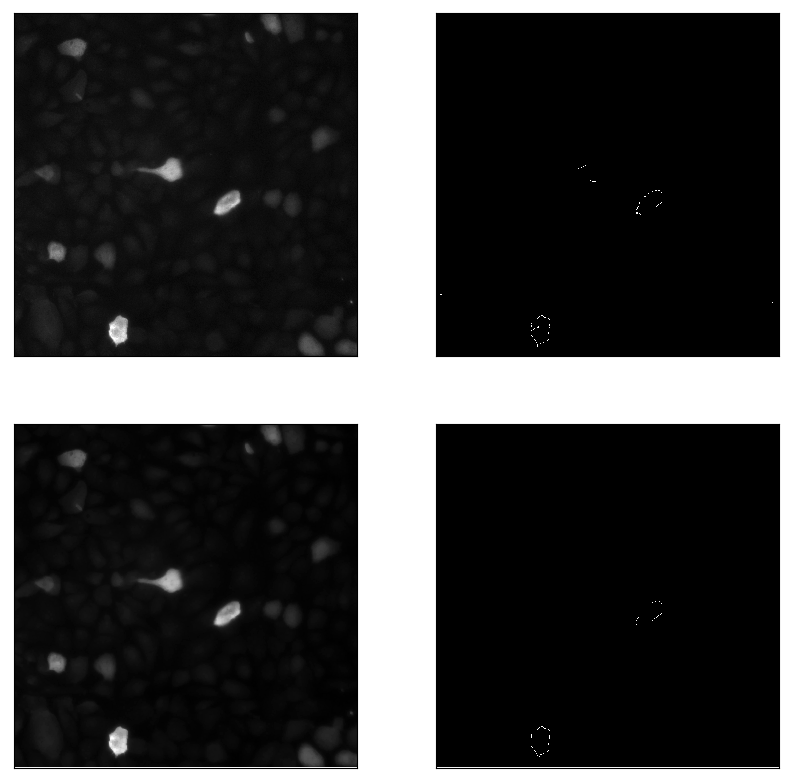

fm before = 394.02852058410645, fm after = 229.57091331481934


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [464]:
#image with no bubble, misjudged
imagePath = "Images/Bubbles/bubble_348.39MFGTMP_191024160001_A02f49d2.TIF" 
remove_bubbles(imagePath)

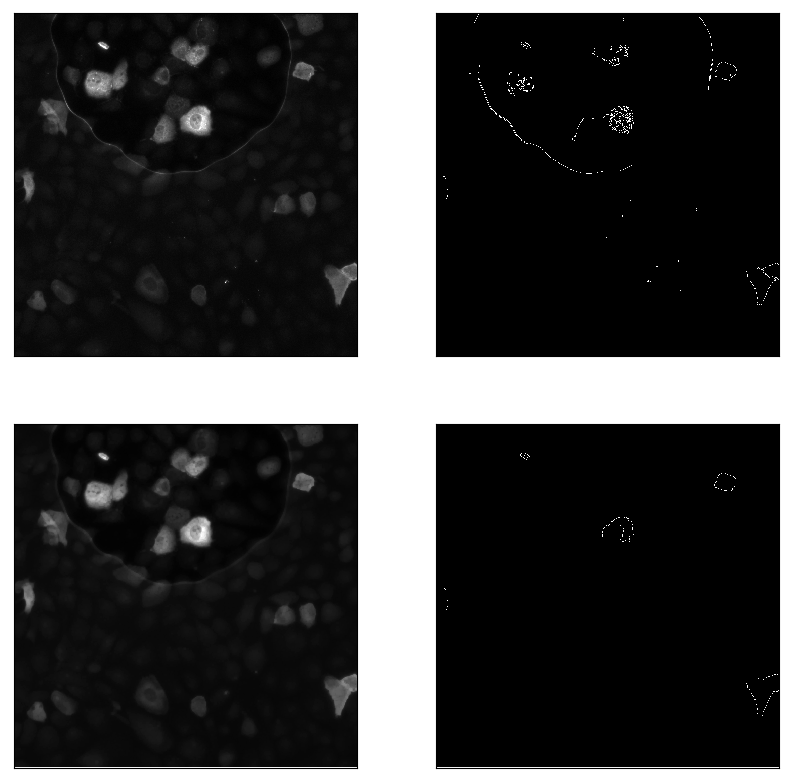

fm before = 3173.2504577268487, fm after = 609.2124936599223


In [465]:
#image with big bubble, correctly judged
imagePath = "Images/Bubbles/MFGTMP_191024160002_A02f262d2.TIF" 
edges_before, edges_after = remove_bubbles(imagePath)

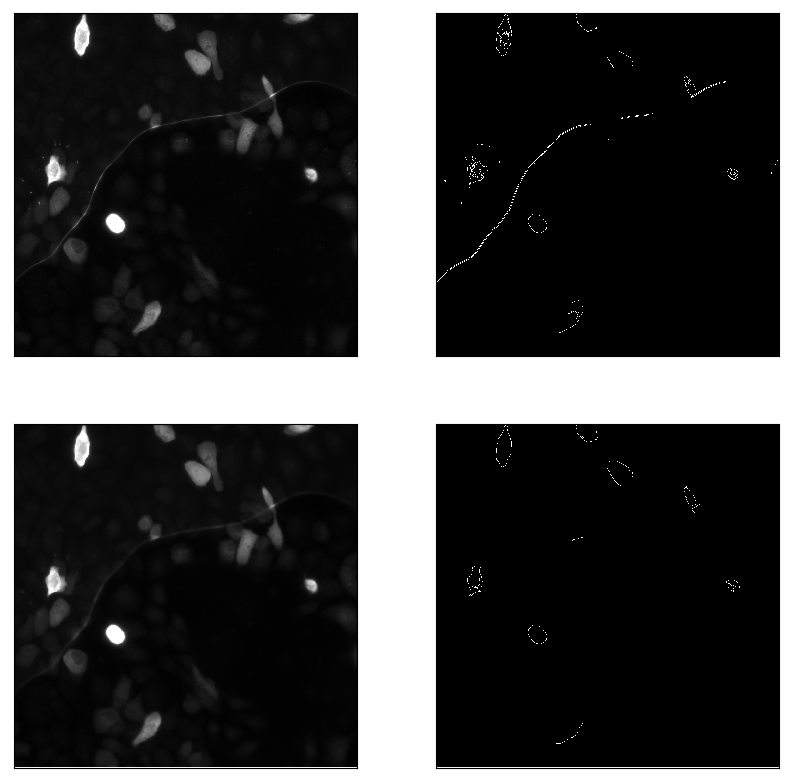

fm before = 2800.7403371352634, fm after = 1068.1062698364258


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [467]:
# image with big bubble, inccorectly labeled
imagePath = "Images/Y180H/MFGTMP_191024160002_A02f222d2.TIF" 
remove_bubbles(imagePath)

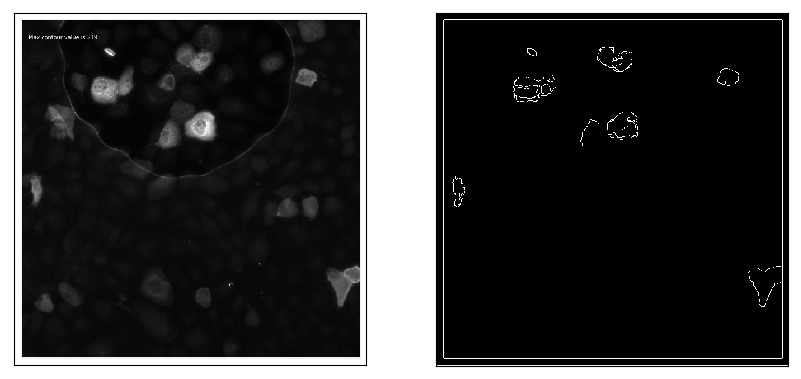

[0, 8] 

Max value is 8


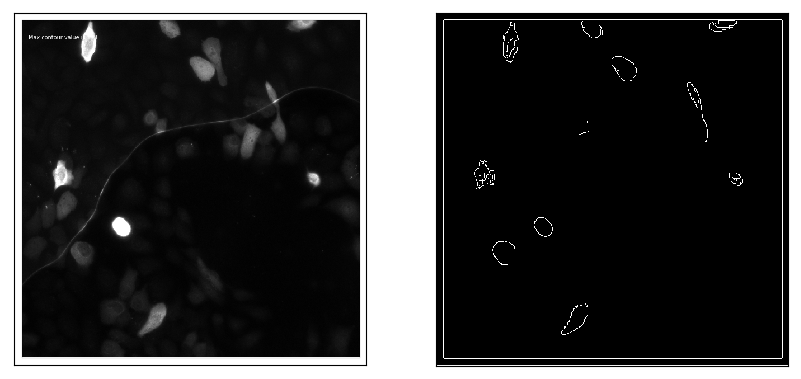

[0, 8] 

Max value is 8


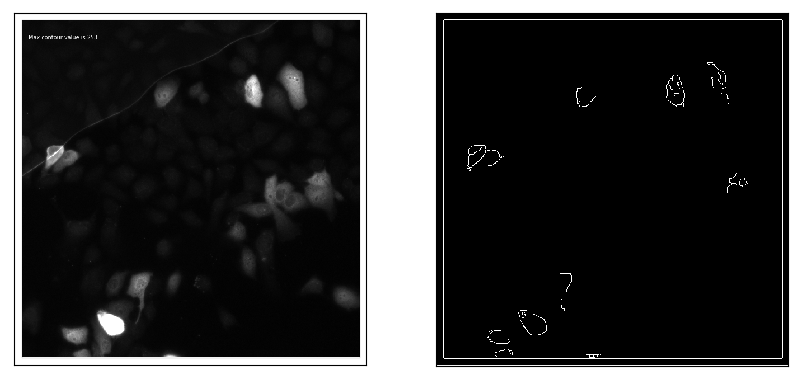

[0, 8] 

Max value is 8


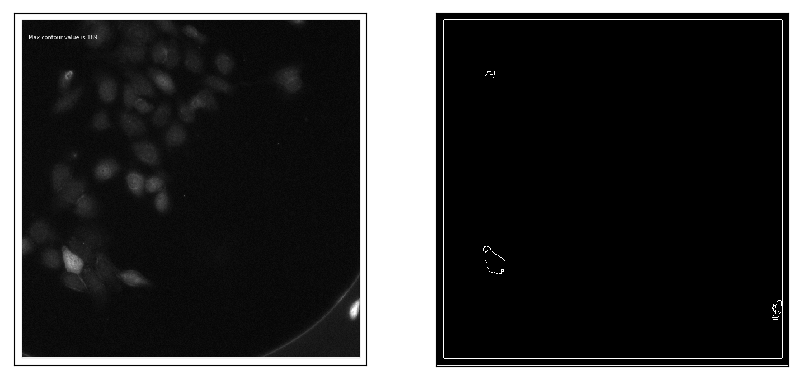

[0, 8] 

Max value is 8


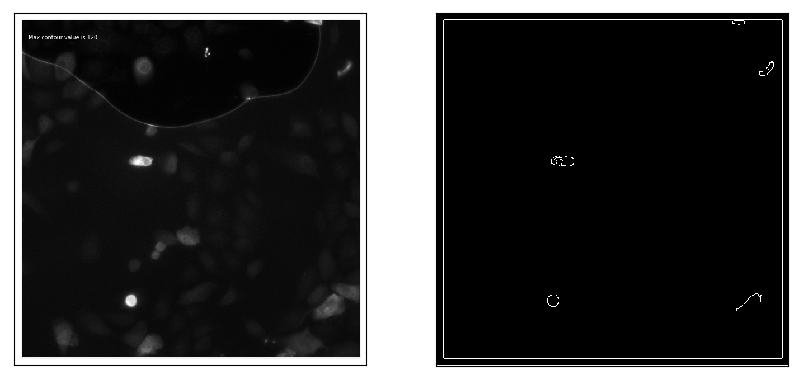

[0, 8] 

Max value is 8


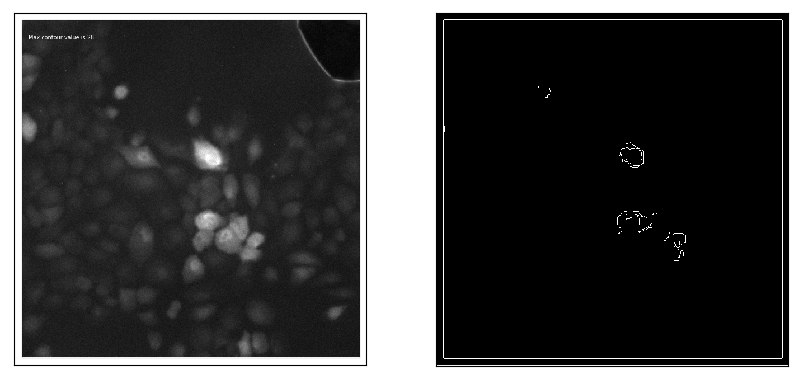

[0, 8] 

Max value is 8


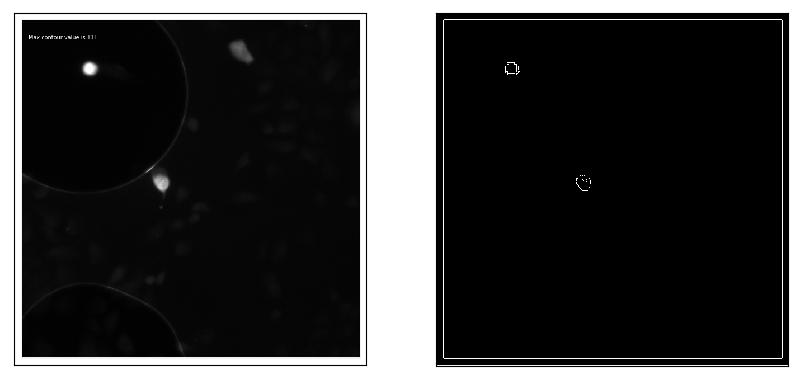

[0, 8] 

Max value is 8


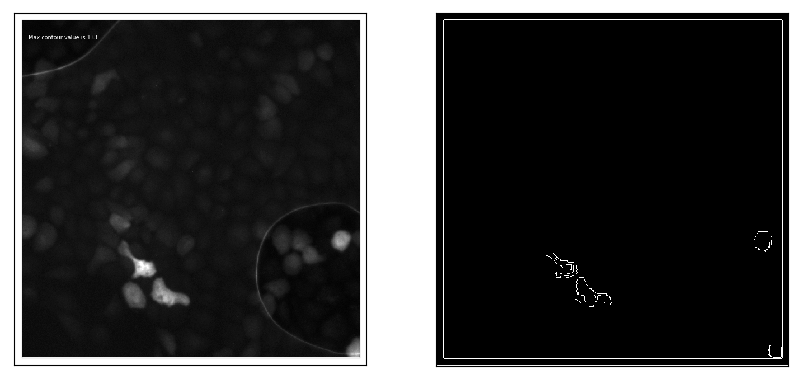

[0, 8] 

Max value is 8


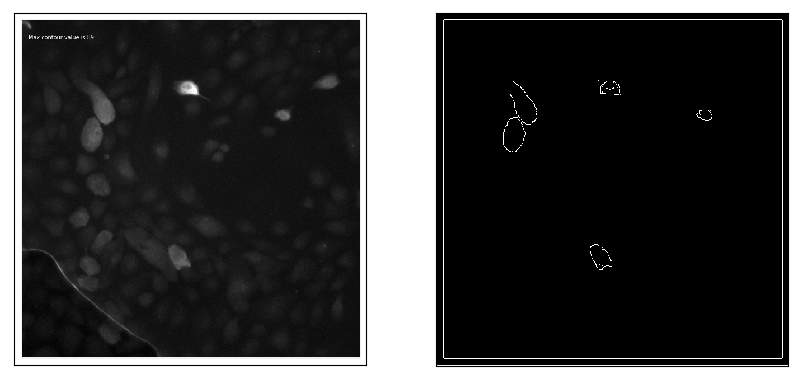

[0, 8] 

Max value is 8


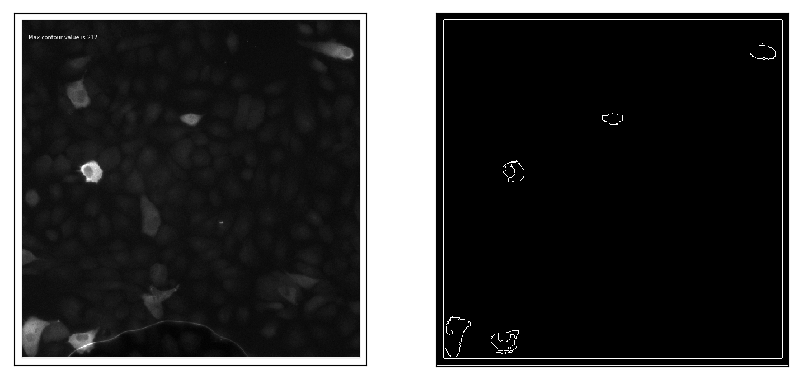

[0, 8] 

Max value is 8


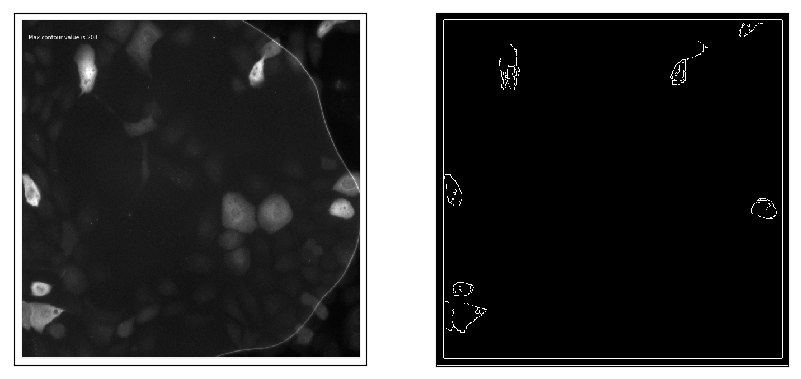

[0, 8] 

Max value is 8


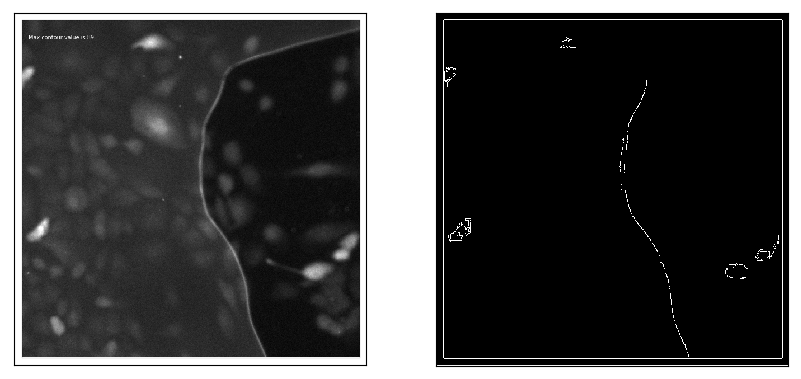

[0, 8] 

Max value is 8


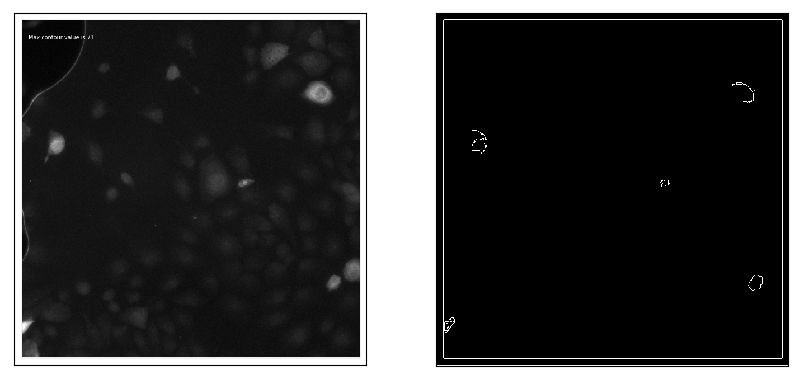

[0, 8] 

Max value is 8


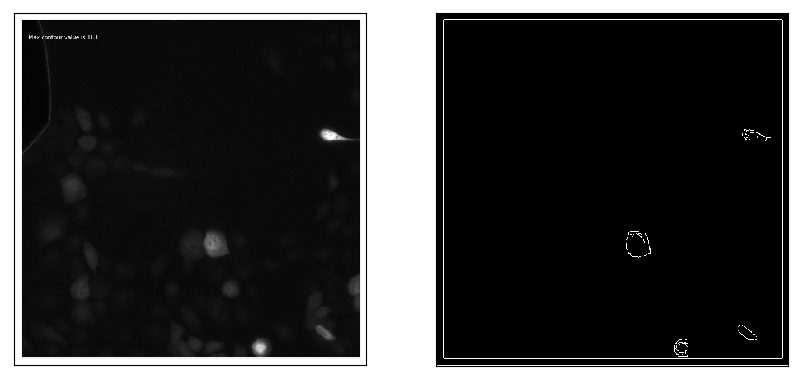

[0, 8] 

Max value is 8


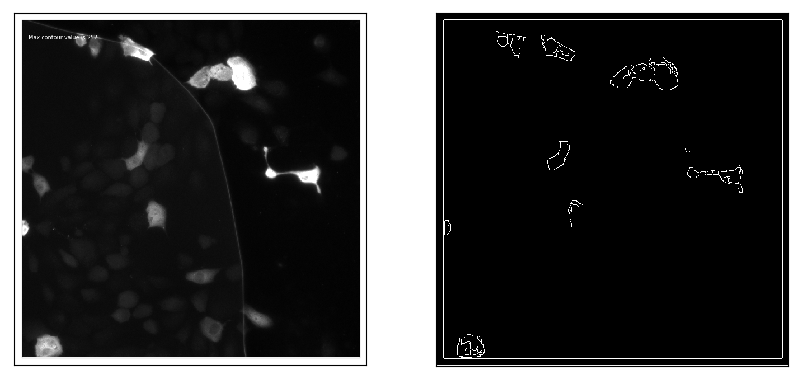

[0, 8] 

Max value is 8


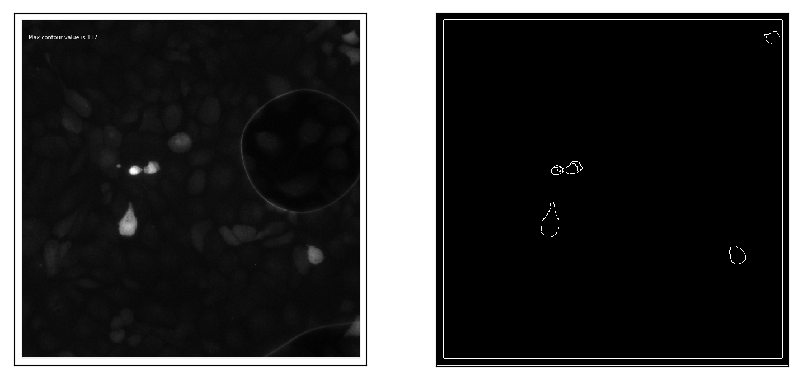

[0, 8] 

Max value is 8


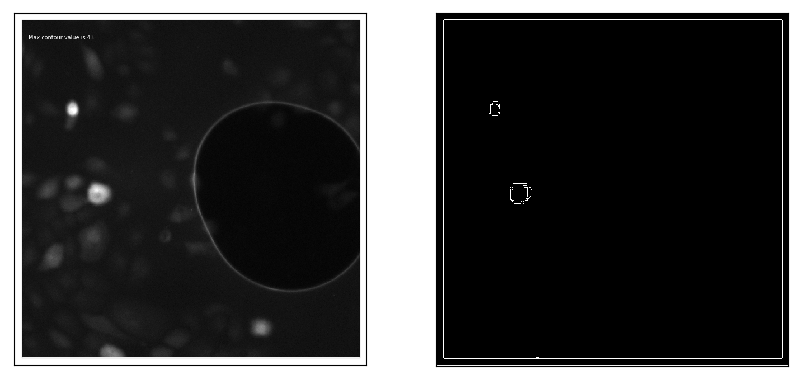

[0, 8] 

Max value is 8


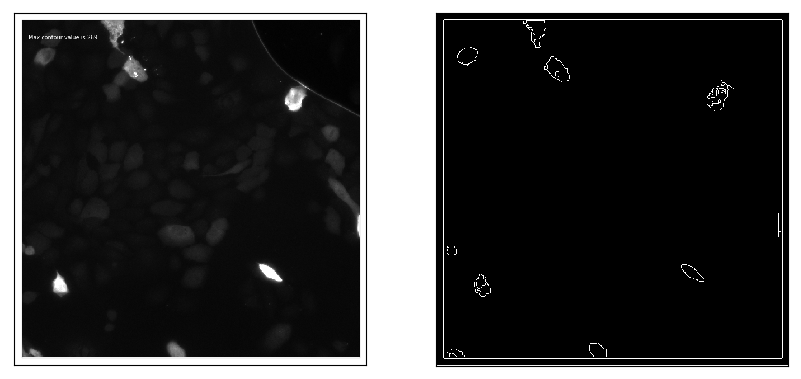

[0, 8] 

Max value is 8


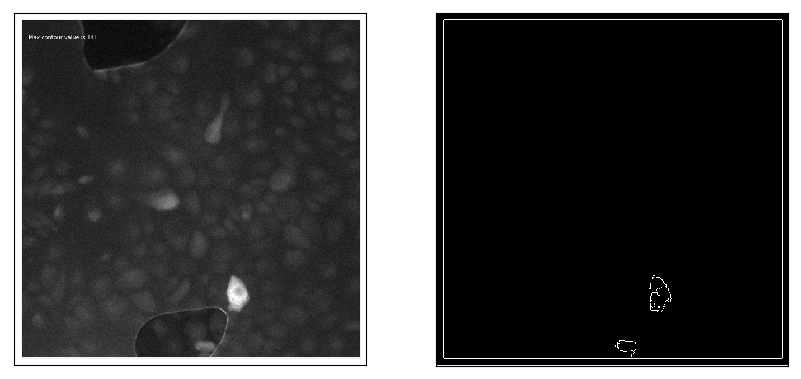

[0, 8] 

Max value is 8


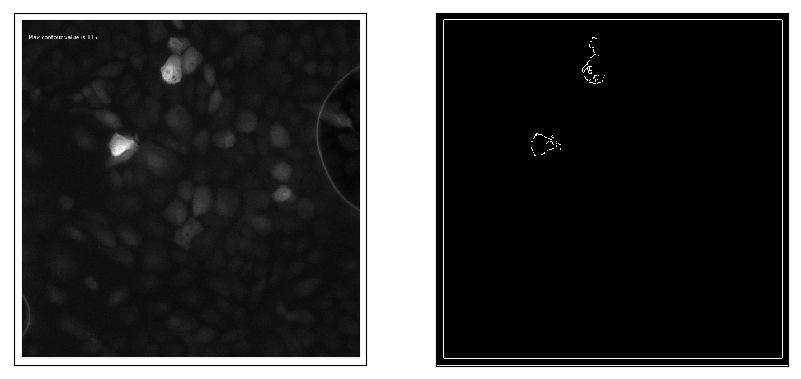

[0, 8] 

Max value is 8


In [159]:
file_path = "Images/Bubbles/has_bubbles/"
for entry in os.scandir(file_path):
    if entry.name.endswith('.TIF') or entry.name.endswith('.tif'):
        show_contours(file_path + entry.name)

In [98]:
file_path = "Images/Bubbles/"

In [154]:
for entry in os.scandir(file_path):
    if entry.name.endswith('.TIF'):
        print(entry.name)
        image = cv2.imread(entry.path, 0)
        # morphological transformations
        kernel = np.ones((5,5), np.uint8)  # taking a matrix of size 5 as kernel
        morph = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel) # (erosion followed by dilation)
        edges = cv2.Canny(morph, 50, 200)

        # find the contours
        cnts = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = grab_contours(cnts)
        list_of_contours = [0]
        for n in range(len(cnts)):
            list_of_contours.append(len(cnts[n]))
        max_cnts = max(list_of_contours)
        print("Max contour value is {}".format(max_cnts))

        # output the image
        plt.figure(figsize = (8,8))
        plt.subplot(1,1,1)
        plt.imshow(image, 'gray')
        plt.text(20, 60, "Max contour value is {}".format(str(max_cnts)), color='white', fontsize=7)
        plt.xticks([]),plt.yticks([]) #hide ticks

        #save the image
        plt.savefig(file_path + "bubble_gum/" + str(max_cnts) + 
                    entry.name, dpi=100, bbox_inches='tight')
        plt.close()

MFGTMP_191023120002_C01f401d2.TIF
Max contour value is 141
bubble_1497.17MFGTMP_191024160002_A02f262d2.TIF
Max contour value is 219
MFGTMP_191023110002_B01f121d2.TIF
Max contour value is 137
bubble_1004.61MFGTMP_191024160002_A02f310d2.TIF
Max contour value is 120
bubble_869.29MFGTMP_191024160002_A02f244d2.TIF
Max contour value is 250
bubble_2034.57MFGTMP_191024160002_A02f294d2.TIF
Max contour value is 252
bubble_773.92MFGTMP_191024160001_A02f101d2.TIF
Max contour value is 89
MFGTMP_191023110002_B01f73d2.TIF
Max contour value is 189
bubble_690.76MFGTMP_191024160002_A02f311d2.TIF
Max contour value is 117
MFGTMP_191023110002_B01f127d2.TIF
Max contour value is 43
bubble_353.84MFGTMP_191024160001_A02f71d2.TIF
Max contour value is 164
bubble_792.09MFGTMP_191024160001_A02f98d2.TIF
Max contour value is 71
bubble_666.08MFGTMP_191024160002_A02f261d2.TIF
Max contour value is 212
bubble_671.10MFGTMP_191024160001_A02f85d2.TIF
Max contour value is 193
bubble_729.15MFGTMP_191024160002_A02f239d2.TIF
M

# try connected component labeling (aka analysis)

In [265]:
# gonna use sci-kit image
from skimage import measure

In [281]:
def show_images(list_of_images, list_of_titles):
    fig = plt.figure(figsize=(8,8), dpi=200)
    images = list_of_images
    titles = list_of_titles
    n = len(list_of_images)

    for i in range(n):
        plt.subplot(n,1,i+1)
        plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([]) #hide ticks

    plt.show()
    plt.close(fig)

In [468]:
# load image
#imagePath = "Images/Bubbles/MFGTMP_191024160002_A02f262d2.TIF"
imagePath = "Images/Bubbles/MFGTMP_191024160002_A02f231d2.TIF"
image = cv2.imread(imagePath, 0) # flag=0 for grayscale, 1 for color

In [469]:
# blurring
blr = cv2.medianBlur(image, 5)

# morphological transformations (matrix size in odd numbers only)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))  # taking a matrix of size n as kernel
morph = cv2.morphologyEx(blr, cv2.MORPH_OPEN, kernel) # (erosion followed by dilation)

# adaptive thresholding
thresh = cv2.adaptiveThreshold(morph, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV, 11, 2)
thresh = cv2.bitwise_not(thresh)

# edge detection
edges = cv2.Canny(morph, 50, 150)

error: OpenCV(4.1.1) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'locateROI'


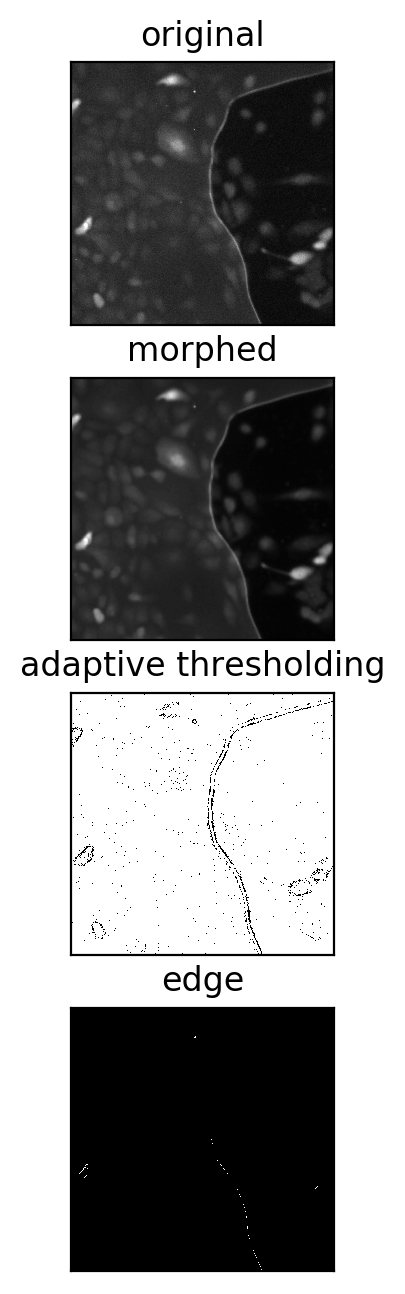

fm before = 1995.629806496599, fm after = 404.94275093078613


In [458]:
show_images([image, morph, thresh, edges], 
            ['original', 'morphed', 'adaptive thresholding', 'edge'])

fm_before = variance_of_laplacian(cv2.Canny(image, 50, 150))
fm_after = variance_of_laplacian(edges)
print("fm before = {0}, fm after = {1}".format(fm_before, fm_after))

In [400]:
# perform connected-component labeling
# neighbors=4 means analyzing 4-way connected components. 4 or 8
labels = measure.label(thresh, neighbors=4, background=0)
print('[INFO] Found a total of {} blobs'.format(len(np.unique(labels))))
      
# initialize an empty mask, for placing the contours later
mask = np.zeros(thresh.shape, dtype='uint8')

# loop over unique components
for label in np.unique(labels):
    #ignore the background label
    if label ==0: # ignore background label
        continue
    
    # construct label mask for current label
    labelMask = np.zeros(thresh.shape, dtype='uint8')
    labelMask[labels == label] = 255
        
    # count the # of non-zero pixels 
    numPixels = cv2.countNonZero(labelMask)
    
    # if # of pixels in the component is greater than a threshold (300),
    # then add it to the empty mask
    if numPixels > 900000 and numPixels < 950000:
        mask = cv2.add(mask, labelMask)

[INFO] Found a total of 1570 blobs


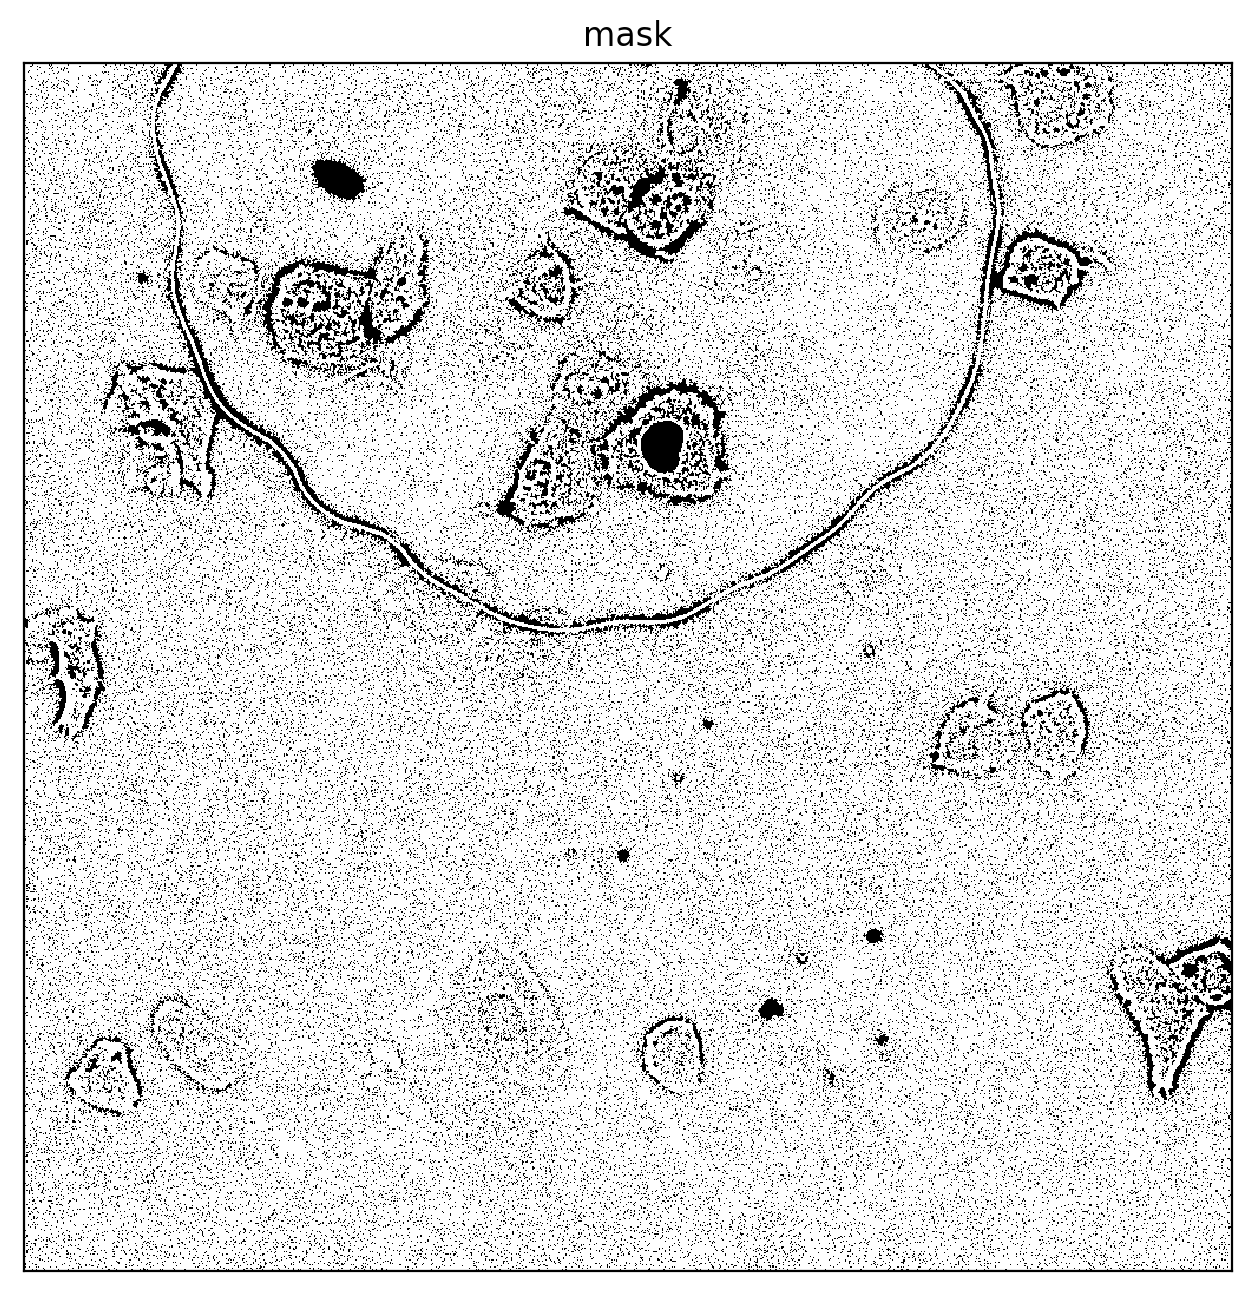

In [401]:
show_images([mask], ["mask"])